In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
import matplotlib.ticker

matplotlib.rcParams.update({'font.size': 16})

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Data: property and violent crime rates by state (1990 - 2014)
An offense rate, or **crime rate**, defined as the number of offenses per 100,000 population. Crime or arrest rates are derived from law enforcement agencies for which 12 months of complete offense or arrest data have been submitted. 

In the FBI’s Uniform Crime Reporting (UCR) Program, **violent crime** is composed of four offenses: murder and nonnegligent manslaughter, rape, robbery, and aggravated assault. Violent crimes are defined in the UCR Program as those offenses that involve force or threat of force; **property crime** includes the offenses of burglary, larceny-theft, motor vehicle theft, and arson. 



In [4]:
df_crime_p = pd.read_csv('data/data_crime/CrimeTrendsIn_property.csv', skiprows = 4, nrows = 25, index_col= 'Year')
df_crime_v = pd.read_csv('data/data_crime/CrimeTrendsIn_violent.csv', skiprows = 4, nrows = 25, index_col= 'Year')
df_crime_p.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States-Total'],
      dtype='object')

In [5]:
df_crime_p2 = df_crime_p.unstack()
df_crime_p3 = df_crime_p2.reset_index()
df_crime_p3 = df_crime_p3.rename(columns = {'level_0':'name', 'Year':'year', 0:'crime_rate_property'})
df_crime_p3.head()

,name,year,crime_rate_property
0,Alabama,1990,4206.7
1,Alabama,1991,4521.4
2,Alabama,1992,4396.4
3,Alabama,1993,4098.4
4,Alabama,1994,4219.4


In [6]:
df_crime_v2 = df_crime_v.unstack()
df_crime_v3 = df_crime_v2.reset_index()
df_crime_v3 = df_crime_v3.rename(columns = {'level_0':'name', 'Year':'year', 0:'crime_rate_violent'})
df_crime_v3.head()

,name,year,crime_rate_violent
0,Alabama,1990,708.6
1,Alabama,1991,844.2
2,Alabama,1992,871.7
3,Alabama,1993,780.4
4,Alabama,1994,683.7


In [7]:
df_crime = pd.merge(df_crime_p3, df_crime_v3, on = ['name', 'year'])

# Data: eviction rates by state (2000 - 2016)

In [8]:
df_e = pd.read_csv('data/states.csv')
df_e = df_e.rename(columns = lambda x: x.lower().replace('-','_'))
df_e_nation = pd.read_csv('data/national.csv')
df_e_nation = df_e_nation.rename(columns = lambda x: x.lower().replace('-','_'))


In [14]:
df_ec = pd.merge(df_crime, df_e, how = 'outer', on = ['year', 'name'])
df_ec.to_csv('data/states_eviction_crime_by_year.csv')
#df_ec.head()

In [27]:
df_unemploy_nation = pd.read_excel('data/US_unemployment_rate.xlsx')
df_unemploy_nation = df_unemploy_nation.rename(columns= lambda x: x.lower().replace(' ','_'))
df_unemploy_nation.head()

,year,unemployment_rate_(december),gdp_growth,inflation_(december_year-over-year),what_happened
0,1929,0.032,NaN,0.006,Market crash
1,1930,0.087,-0.085,-0.064,Smoot-Hawley
2,1931,0.159,-0.064,-0.093,Dust Bowl
3,1932,0.236,-0.129,-0.103,Hoover's tax hikes
4,1933,0.249,-0.013,0.008,FDR's New Deal


# Visualization: Trend Comparison of Evictoin Rate VS Crime Rate (Nationwide)

In [11]:
df_c_nation = df_crime.loc[df_crime['name']=='United States-Total',:]
df_c_nation.head()

,name,year,crime_rate_property,crime_rate_violent
1275,United States-Total,1990,5073.1,729.6
1276,United States-Total,1991,5140.2,758.2
1277,United States-Total,1992,4903.7,757.7
1278,United States-Total,1993,4740.0,747.1
1279,United States-Total,1994,4660.2,713.6


In [12]:
df_ec_nation = pd.merge(df_c_nation, df_e_nation, how = 'outer', on = 'year')
df_ec_nation.to_csv('data/nation_evict_crime_by_year.csv')
#df_ec_nation
# plt.plot(df_ec_nation.year, df_ec_nation.crime_rate_property,'b--',\
#          df_ec_nation.year, df_ec_nation.crime_rate_violent,'g--',\
#          df_ec_nation.year, df_ec_nation.eviction_rate,'r--')

## Eviction Rate vs Property Crime Rate

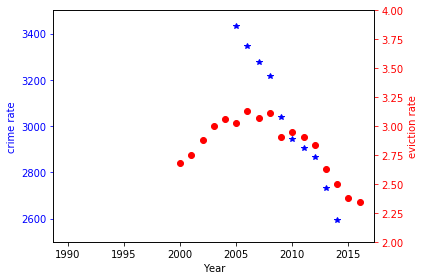

In [11]:
fig, ax1 = plt.subplots()

ax1.plot(df_ec_nation.year, df_ec_nation.crime_rate_property,'b *')
ax1.set_ylim(2500, 3500)
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('crime rate', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(df_ec_nation.year, df_ec_nation.eviction_rate,'ro')
ax2.set_ylim(2,4)
ax2.set_ylabel('eviction rate', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()         

## Eviction Rate vs Violent Crime Rate

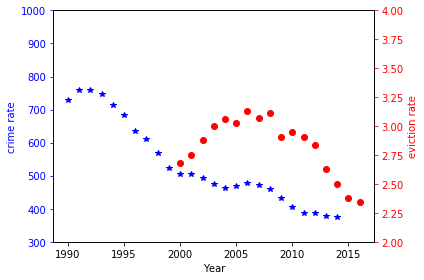

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(df_ec_nation.year, df_ec_nation.crime_rate_violent,'b *')
ax1.set_ylim(300, 1000)
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('crime rate', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(df_ec_nation.year, df_ec_nation.eviction_rate,'ro')
ax2.set_ylim(2,4)
ax2.set_ylabel('eviction rate', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()         

## Eviction Rate vs Property and Violent Crime Rate Combined

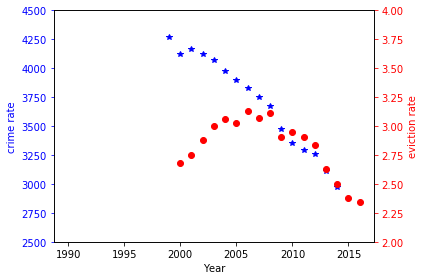

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(df_ec_nation.year, df_ec_nation.crime_rate_property + df_ec_nation.crime_rate_violent,'b *')
ax1.set_ylim(2500, 4500)
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('crime rate', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(df_ec_nation.year, df_ec_nation.eviction_rate,'ro')
ax2.set_ylim(2,4)
ax2.set_ylabel('eviction rate', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()         

# Eviction Rate vs Unemployment Rate (Nationwide)

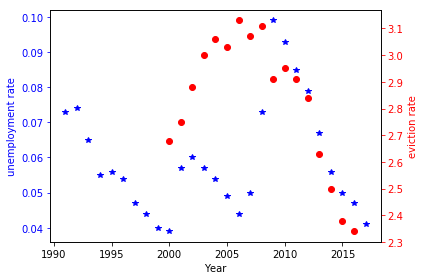

In [32]:
fig, ax1 = plt.subplots()

ax1.plot(df_unemploy_nation.loc[df_unemploy_nation.year > 1990, 'year'], df_unemploy_nation.loc[df_unemploy_nation.year > 1990, 'unemployment_rate_(december)'],'b *')
#ax1.set_ylim(2500, 4500)
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('unemployment rate', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(df_ec_nation.year, df_ec_nation.eviction_rate,'ro')
#ax2.set_ylim(2,4)
ax2.set_ylabel('eviction rate', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()  

# Visualization: Trend Comparison of Eviction Rate VS Crime Rate (by State)

In [14]:
states_list =['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont']

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


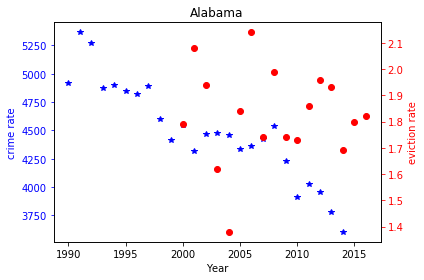

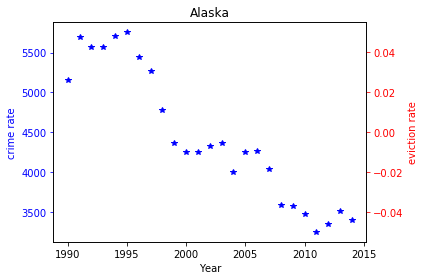

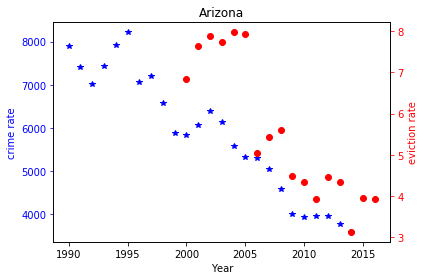

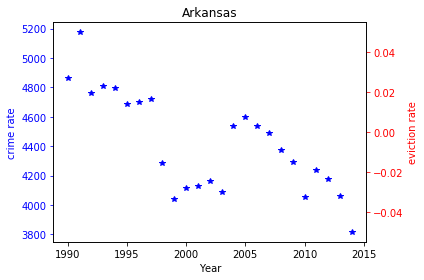

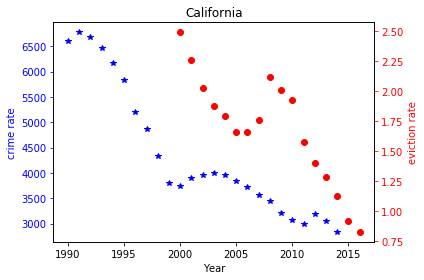

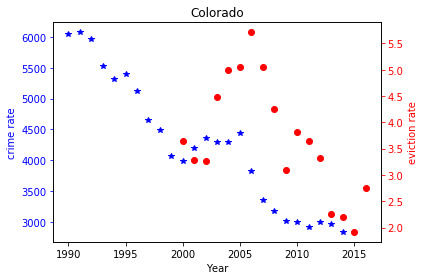

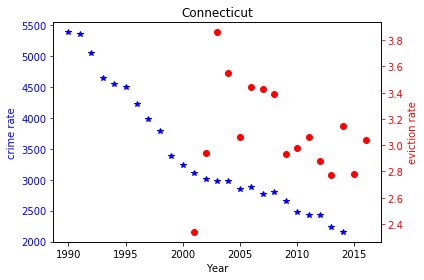

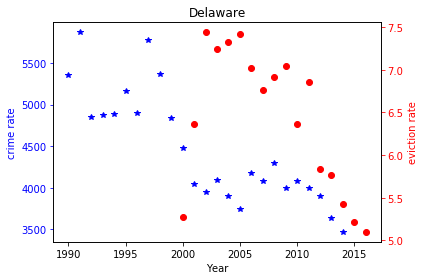

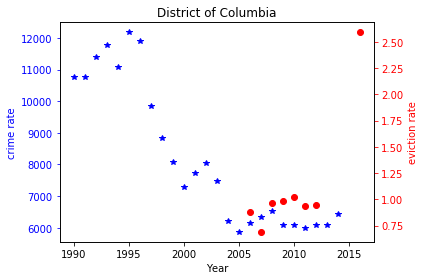

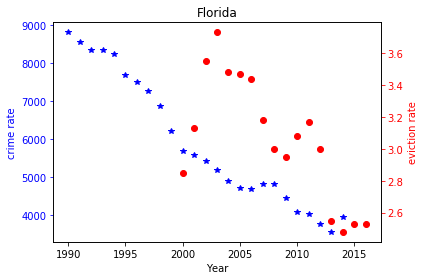

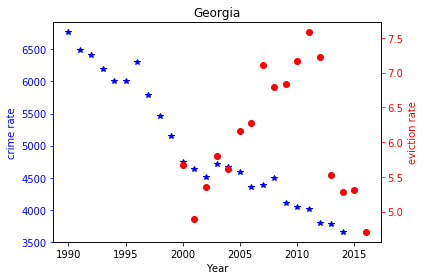

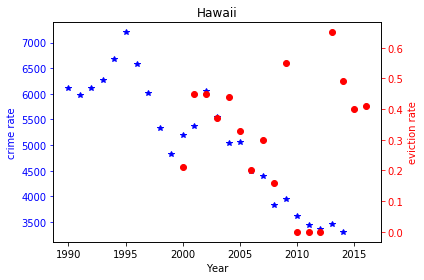

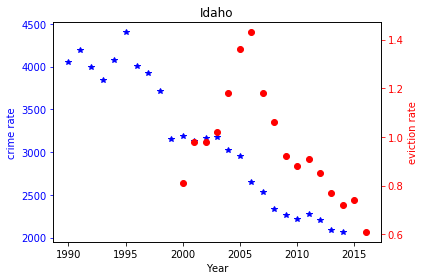

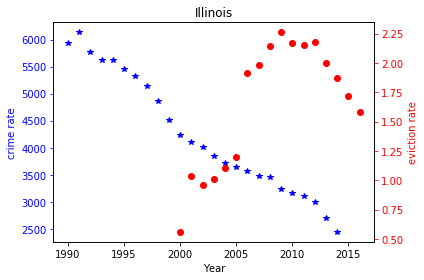

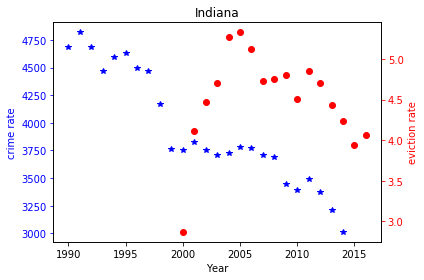

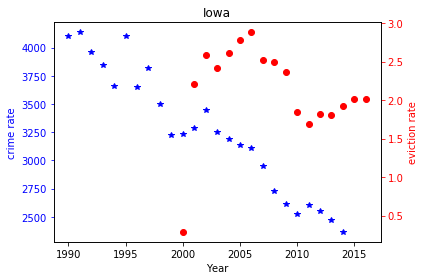

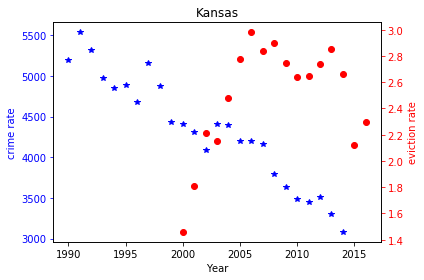

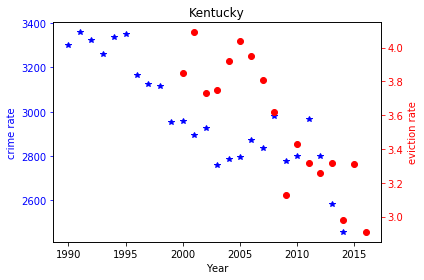

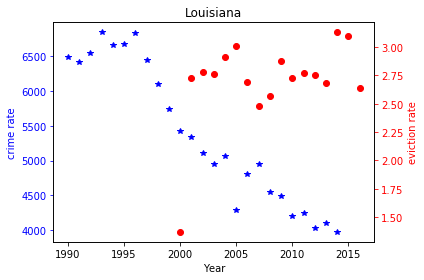

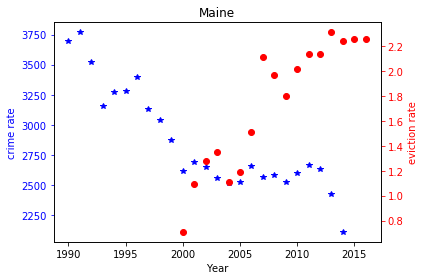

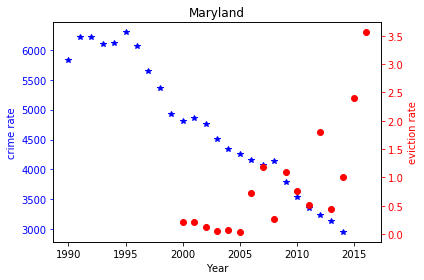

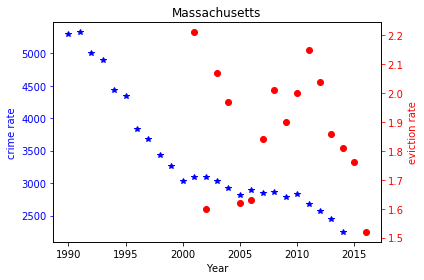

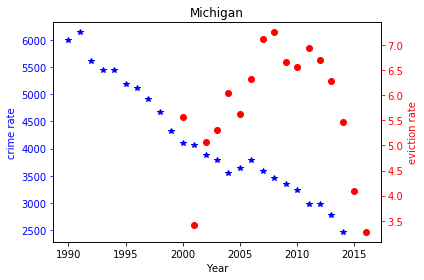

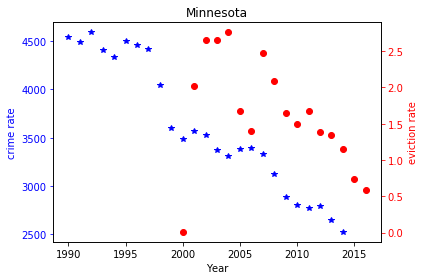

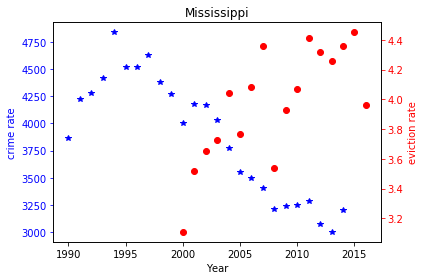

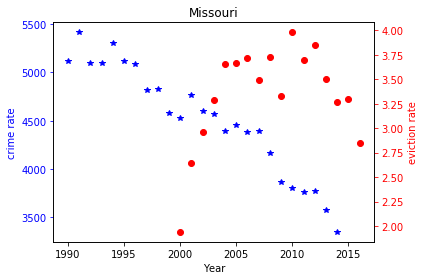

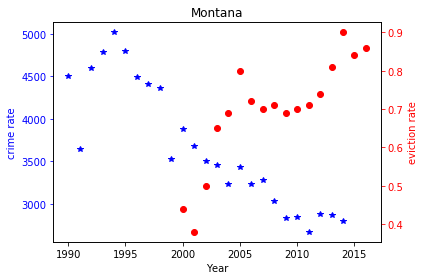

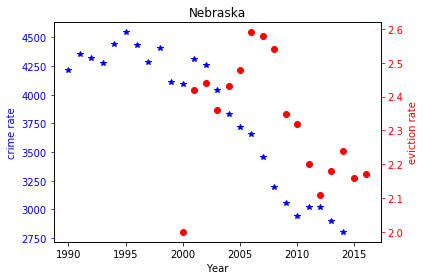

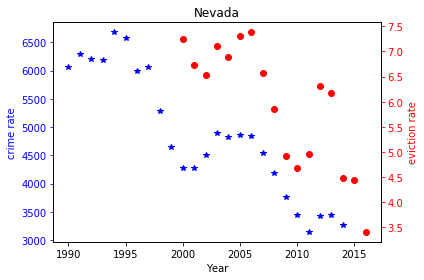

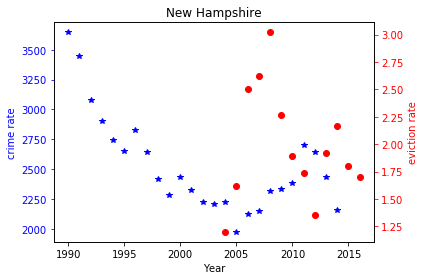

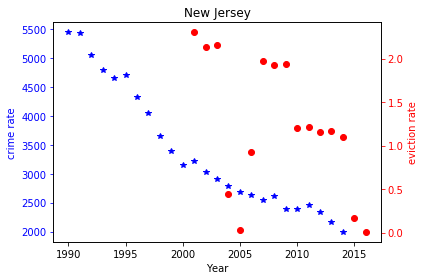

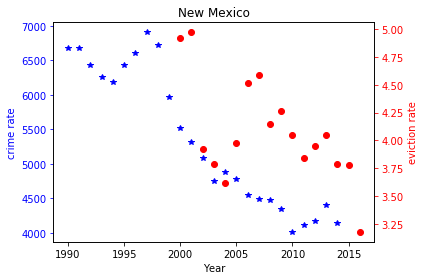

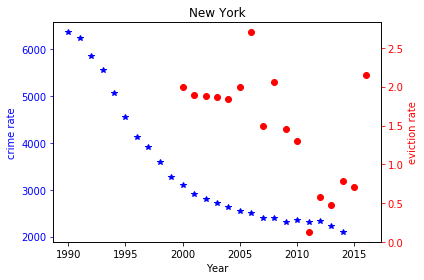

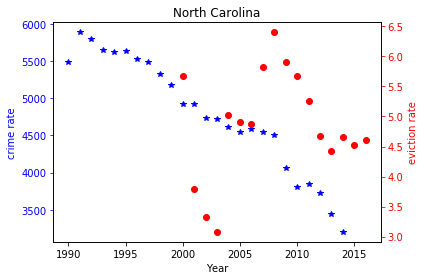

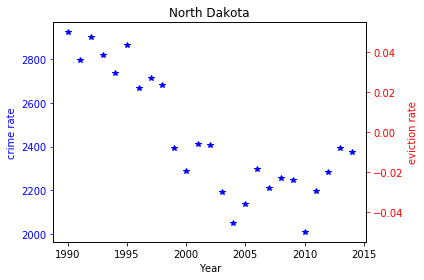

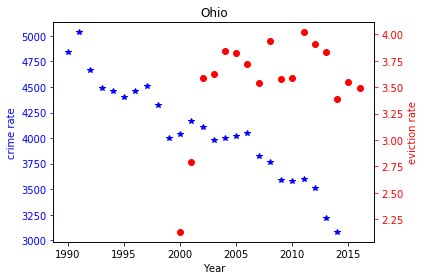

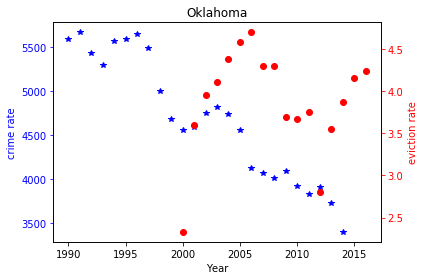

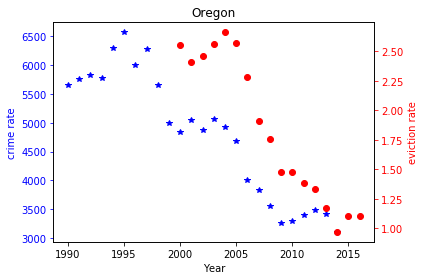

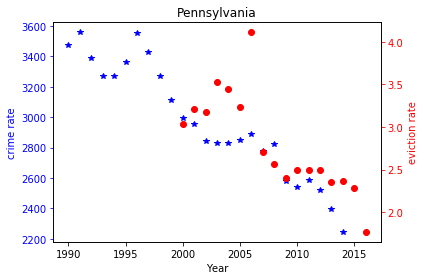

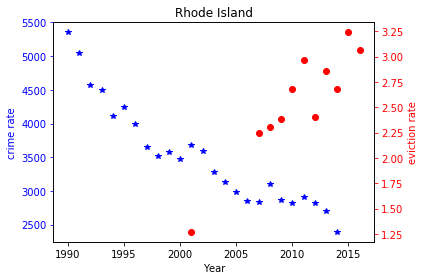

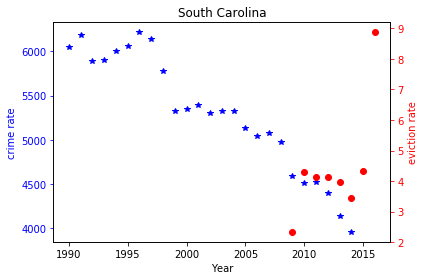

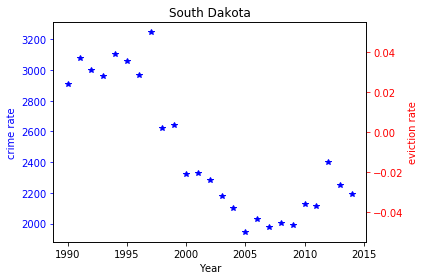

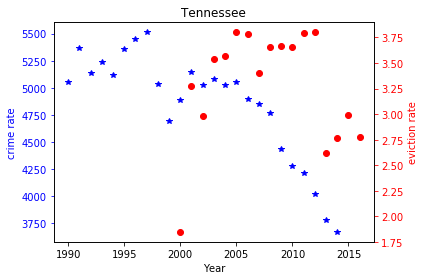

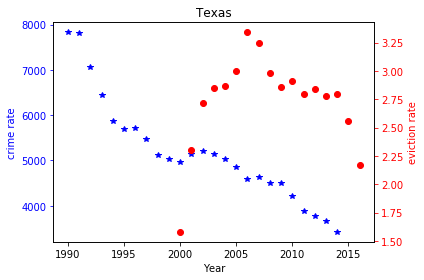

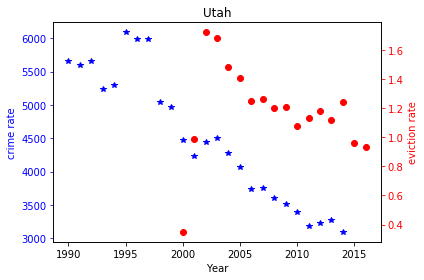

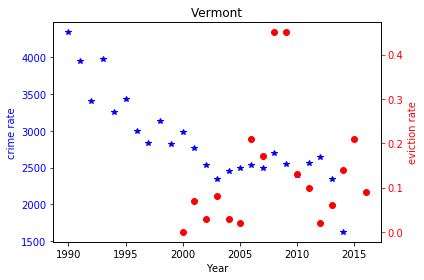

In [15]:
for char in states_list:
    
    fig, ax1 = plt.subplots()

    ax1.plot(df_ec.loc[df_ec.name == char, :].year, df_ec.loc[df_ec.name == char, :].crime_rate_property\
             + df_ec.loc[df_ec.name == char, :].crime_rate_violent,'b *')
    #ax1.set_ylim(2500, 4500)
    ax1.set_xlabel('Year')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('crime rate', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(char)
    
    ax2 = ax1.twinx()

    ax2.plot(df_ec.loc[df_ec.name == char, :].year, df_ec.loc[df_ec.name == char, :].eviction_rate,'ro')
    #ax2.set_ylim(1,4)
    ax2.set_ylabel('eviction rate', color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()      